<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/simulation/maptheory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teorie pro práci s mapami

## Matematické základy

### Lineární transformace

Chceme-li na určitém intervalu zobrazit jiný interval, můžeme toto provést s pomocí tzv. lineární transformace.

Nechť zobrazovaný interval má rozsah $<a_0;a_1>$ a má být zobrazen na interval $<b_0;b_1>$. Hledáme funkci $f$, pro kterou platí $f(a_0)=b_0$ a $f(a_1)=b_1$. Vzhledem k povaze úlohy je dostatečné konstatovat, že tato funkce je ve tvaru $f(x) = k \cdot x + c$. Odtud lze napsat soustavu rovnic
$$b_0=k \cdot a_0 + c$$
$$b_1=k \cdot a_1 + c$$
Jedná se o systém dvou lineráních rovnic o dvou neznámých, jehož řešení je triviální.
$$b_0-b_1=k \cdot(a_0 - a_1)$$
odtud
$$k = \frac{b_0-b_1}{a_0 - a_1}$$
$$c = b_0 - a_0 \cdot \frac{b_0-b_1}{a_0 - a_1}$$


In [ ]:
b0 = 0
b1 = 5
a0 = 45000
a1 = 50000

k = (b0 - b1) / (a0 - a1)
c = b0 - a0 * k
def transform(x):
  result = k * x + c
  return result

print(a0, '=>', transform(a0), '\t', b0)
print(a1, '=>', transform(a1), '\t', b1)

45000 => 0.0 	 0
50000 => 5.0 	 5


### Lineární transformace 2D

Při práci s mapou určujeme nikoliv souřadnici jednu, ale dvě. To znamená, že poloha na mapě je určena dvěma hodnotami.
$$X=(x_x, x_y)$$
V nejjednodušší variantě to znamená, že lineární transformace je definována v prostoru $R \times R$. Jeví se, že pro popis takové transformace jsou potřeba 4 body. Vzhledem ke skutečnosti, že u mapy se požaduje stejné měřítko v obou osách, tedy koeficient $c$ je shodný pro obě osy, mohly by nám stačit dva body.
$$b_{x0}=k_x \cdot a_{x0} + c$$
$$b_{x1}=k_x \cdot a_{x1} + c$$
$$b_{y0}=k_y \cdot a_{y0} + c$$
$$b_{y1}=k_y \cdot a_{y1} + c$$
Ve výše uvedené soustavě jsou tři neznámé $k_x$, $k_y$ a $c$. Soustava má ovšem čtyři rovnice. Lze ji rozdělit na dvě soustavy o dvou neznámých a aplikovat postup v předchozí podkapitole.


In [ ]:
b0 = {'x':0, 'y':0}
b1 = {'x':5, 'y':5}
a0 = {'x':45000, 'y':45000}
a1 = {'x':50000, 'y':50000}

k_x = (b0['x'] - b1['x']) / (a0['x'] - a1['y'])
c = b0['x'] - a0['x'] * k_x
k_y = (b0['y'] - b1['y']) / (a0['y'] - a1['y'])

def transform2D(X):
  result = {
      'x': k_x * X['x'] + c,
      'y': k_y * X['y'] + c
      }
  return result

print(a0, '=>', transform2D(a0), '\t', b0)
print(a1, '=>', transform2D(a1), '\t', b1)

{'x': 45000, 'y': 45000} => {'x': 0.0, 'y': 0.0} 	 {'x': 0, 'y': 0}
{'x': 50000, 'y': 50000} => {'x': 5.0, 'y': 5.0} 	 {'x': 5, 'y': 5}


### Lineární transformace II

Vztahy v první podkapitole mohou být prezentovány ve vektorové formě.
$$\vec{b_0}=k \cdot \vec{a_0} + c$$
Je vhodné si vzpomenout na lineární algebru a tyto vztahy uvést v maticovém tvaru
$$\vec{b_0}=K \cdot \vec{a_0}$$
kde 
$$\vec{b_0}=\begin{pmatrix}
b_{x0}\\
b_{y0}\\
1
\end{pmatrix}$$
$$\vec{a_0}=\begin{pmatrix}
a_{x0}\\
a_{y0}\\
1
\end{pmatrix}$$
$$K=\begin{pmatrix}
k & 0 & c_x\\
0 & k & c_y\\
0 & 0 & 1
\end{pmatrix}$$
tedy v celkovém zápisu
$$\begin{pmatrix}
b_{x0}\\
b_{y0}\\
1
\end{pmatrix}
=
\begin{pmatrix}
k & 0 & c_x\\
0 & k & c_y\\
0 & 0 & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
a_{x0}\\
a_{y0}\\
1
\end{pmatrix}$$


### Lineární transformace III

Rovnice
$$\vec{b_0}=K \cdot \vec{a_0}$$
v rozepsaném tvaru
$$\begin{pmatrix}
b_{x0}\\
b_{y0}\\
1
\end{pmatrix}
=
\begin{pmatrix}
k & 0 & c_x\\
0 & k & c_y\\
0 & 0 & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
a_{x0}\\
a_{y0}\\
1
\end{pmatrix}$$
Umožňuje matici $K$ počítat jako součin matic
$$K=K_1 \cdot K_2 \cdot K_3 \dots K_n$$
kde jednotlivé matice představují elementární operace
- posun
$$\begin{pmatrix}
1 & 0 & c_x\\
0 & 1 & c_y\\
0 & 0 & 1
\end{pmatrix}
$$
- zvětšení / zmenšení
$$\begin{pmatrix}
z & 0 & 0\\
0 & z & 0\\
0 & 0 & 1
\end{pmatrix}
$$
- otočení
$$\begin{pmatrix}
cos(\alpha) & sin(\alpha) & 0\\
-sin(\alpha) & cos(\alpha) & 0\\
0 & 0 & 1
\end{pmatrix}
$$



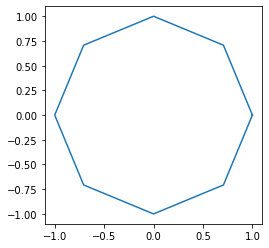

In [ ]:
import matplotlib.pyplot as plt
from math import sin, cos, pi, sqrt

segments = 8
alpha = 2 * pi / segments
cosalpha = cos(alpha)
sinalpha = sin(alpha)

cx = 1.0
cy = 0.0

x = [cx]
y = [cy]
for i in range(segments):
  ncx = cx * cosalpha - cy * sinalpha
  ncy = cx * sinalpha + cy * cosalpha
  
  cx = ncx
  cy = ncy

  x.append(cx)
  y.append(cy)

ax = plt.plot(x, y)
plt.gca().set_aspect('equal')

## Zobrazení mapy

Při zobrazení mapy je využívána matice zobrazení, kterou jsou násobeny souřadnice a získávány body na obrazovce či na papíru, se kterými má být souřadnice ztotožněna.

Využití nástrojů ZoomIn, ZoomOut a Pan je potom realizováno násobením aktuální matice zobrazení a matice definující elementární operaci.

Pro čtení souřadnic z mapy je potřeba mít k dispozici inverzní matici zobrazení, kterou se násobí souřadnice na obrazovce a výsledkem jsou reálné souřadnice.

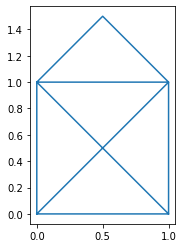

In [ ]:
domecek = [(0, 0), (1, 1), (0, 1), (1, 0), (0, 0), (0, 1), (0.5, 1.5), (1, 1), (1, 0)]
x = []
y = []
for bod in domecek:
  x.append(bod[0])
  y.append(bod[1])

plt.plot(x, y)
plt.gca().set_aspect('equal')

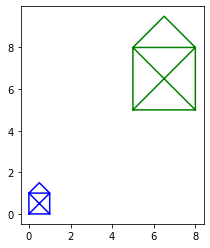

In [ ]:
alpha = pi / 4
cosalpha = cos(alpha)
sinalpha = sin(alpha)

matice = [
  [1, 0, 5],
  [0, 1, 5],
  [0, 0, 1]
          ]

_matice = [
  [cosalpha, -sinalpha, 5],
  [sinalpha, cosalpha, 5],
  [0, 0, 1]
          ]

_matice = [
  [3, 0, 5],
  [0, 3, 5],
  [0, 0, 1]
          ]

def transformace(bod):
  resultx = bod[0] * matice[0][0] + bod[1] * matice[0][1] + matice[0][2]
  resulty = bod[0] * matice[1][0] + bod[1] * matice[1][1] + matice[1][2]  
  return (resultx, resulty)

novyDomecek = []
for bod in domecek:
  novyDomecek.append(transformace(bod))

x2 = []
y2 = []
for bod in novyDomecek:
  x2.append(bod[0])
  y2.append(bod[1])

plt.plot(x, y, 'b')
plt.plot(x2, y2, 'g')
plt.gca().set_aspect('equal')

## Geoid a spol.

Z Wikipedie:
![Geoid](https://upload.wikimedia.org/wikipedia/commons/4/4a/Geoid_undulation_10k_scale.jpg)

### Projekce

[odkaz](https://is.mendelu.cz/eknihovna/opory/zobraz_cast.pl?cast=59996)

Projekce:
- do roviny (gnomic, stereographics)
- do kužele ()
- do válce (mercator, transverse mercator)

Projekce:
- délkojevná
- úhlojevná
- plochojevná

Není možno kombinovat rastrové podklady s různými projekcemi.

## Souřadné systémy

[odkaz](https://geoportal.cuzk.cz/(S(ktowci4sbplf1azd1ehqh2go))/Default.aspx?mode=TextMeta&side=sit.trans&text=souradsystemy)

- JTSK (S-JTSK / Křovákovo zobrazení)
- S42 (Varšavská smlouva)
- WGS84 (World geodetic system)

# Standardy pro zpracování mapových dat

## Typy souborů

[Wiki](https://en.wikipedia.org/wiki/GIS_file_formats)

Rastrové
- TIFF / GeoTIFF
- JPEG
- PNG
- CADRG (MIL) (COMPRESSED ARC DIGITIZED RASTER GRAPHIC)

Vektorové
- SHP ([shapefile](https://cs.wikipedia.org/wiki/Shapefile))
- DGN (Microstation)
- VMAP (Vector Maps)

Výškopisné
- DTED (Digital Terrain Elevation Data)
- DMR (Digitální model reliéfu)

Speciální využití
- TFW (matice zobrazení)

In [1]:
tfwSource = """10000
0
0
-10000
-3683154.58
4212096.53"""
def createTransformation(tfwStr):
  matrixStr = tfwStr.split('\n')
  matrixCoef = []
  for s in matrixStr:
    matrixCoef.append(float(s))
  print(matrixCoef)  
  def Transformation(point):
    resultX = matrixCoef[0] * point[0] + matrixCoef[1] * point[1] + matrixCoef[2]
    resultY = matrixCoef[3] * point[0] + matrixCoef[4] * point[1] + matrixCoef[5]
    return (resultX, resultY)
  return Transformation

transformation = createTransformation(tfwSource)

[10000.0, 0.0, 0.0, -10000.0, -3683154.58, 4212096.53]
